# Tutorial on Hyperdimensional Computing
Translation to Python+numpy from https://michielstock.github.io/posts/2022/2022-10-04-HDVtutorial/

In [2]:
import math
import random
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
N = 10000

def hdv() -> np.ndarray:
    return np.random.choice([-1, 1], size=N)

In [4]:
x = hdv()
x

array([-1,  1, -1, ..., -1,  1,  1])

In [5]:
y = hdv()
y

array([ 1,  1, -1, ..., -1, -1,  1])

In [6]:
np.sum(x == y)

5054

In [7]:
def hdv_m(rows: int) -> NDArray:
    return np.random.choice([-1, 1], size=(rows, N))

In [8]:
V = hdv_m(10)
V

array([[-1,  1, -1, ...,  1,  1, -1],
       [-1, -1, -1, ..., -1,  1, -1],
       [-1,  1,  1, ...,  1, -1,  1],
       ...,
       [ 1, -1,  1, ..., -1,  1,  1],
       [ 1, -1, -1, ..., -1,  1, -1],
       [ 1,  1,  1, ..., -1,  1, -1]])

## Bundling

In [9]:
def bundle_m(U: NDArray[int]) -> NDArray[int]:
    if U.ndim != 2:
        raise ValueError("U must be a 2d array.")

    return np.sign(np.sum(U, axis=0))

# example
U = np.array([[1, 2],
              [-3, 4],
              [5, -6]])

result = bundle_m(U)
print(result)

[1 0]


In [10]:
bundle_m(V)

array([-1,  1, -1, ...,  0,  1, -1])

In [11]:
def bundle(*xs: NDArray[int]) -> NDArray[int]:
    summed = np.add.reduce(xs)
    return np.sign(summed)

# example
xs = bundle(np.array([1, 2]), np.array([-3, 4]), np.array([5, -6]))
print(xs)

[1 0]


In [12]:
bundle(x, y)

array([ 0,  1, -1, ..., -1,  0,  1])

## Binding

In [13]:
def bind(*xs: NDArray[int]):
    return np.multiply.reduce(xs)

# example
xs = bind(np.array([1, 2]), np.array([-3, 4]), np.array([5, -6]))
bind(xs)

array([-15, -48])

In [14]:
bind(x, y)

array([-1,  1,  1, ...,  1, -1,  1])

In [15]:
np.array_equal(bind(bind(x, y), y),
               x)

True

In [16]:
np.array_equal(bind(bind(x, y), x), y)

True

## Shifting

In [17]:
def shift(x, k=1):
    return np.roll(x, k)

# example
shift([1, 2, 3])

array([3, 1, 2])

## Similarity between HDVs

In [18]:
def cos_similarity(x, y):
    return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

# example
cos_similarity([1, 2, 3],
               [4, 5, 6])

0.9746318461970762

In [19]:
cos_similarity(x, y)

0.0108

## Properties of the operations

In [21]:
z = hdv()

In [22]:
np.array_equal(bind(x, bundle(y, z)),
               bundle(bind(x, y), bind(x, z)))

True

In [23]:
np.array_equal(cos_similarity(x,y),
               cos_similarity(bind(x, z), bind(y, z)))

True

# Examples

## Example 1: color matching

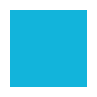

In [24]:
def randcol():
    return np.random.rand(3)

def show_color(color):
    plt.figure(figsize=(1,1))
    plt.imshow([[color]])
    plt.axis('off')
    plt.show()

acolor = randcol()
show_color(acolor)

In [25]:
emojis = ['🍌', '💦', '🥚', '🌅', '🐺', '🌱', '🚒']

In [26]:
toy_data1 = []
for i in range(100):
    toy_data1.append((np.random.choice(emojis), randcol()))

In [27]:
emojis_hdvs = {emoji: hdv() for emoji in emojis}

In [28]:
def range_hdvs(steps):
    k = len(steps) - 1

    V = hdv_m(k + 1)  # V size is (k+1)xN

    for i in range(1, k + 1):  # for each other row/step
        for j in range(N):     # for each column
            V[i, j] = -V[i-1, j] if random.random() < (1 / k) else V[i-1, j]

    return V


In [29]:
color_steps = np.arange(0, 1.05, 0.05)

In [30]:
reds_hdv = range_hdvs(color_steps)
print(reds_hdv.shape)

(21, 10000)


,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20
V0,0.1074,0.1160,0.1274,0.1448,0.1600,0.1876,0.2062,0.2304,0.2596,0.2868,...,0.3634,0.4168,0.4738,0.5324,0.5898,0.6580,0.7258,0.8028,0.9016,1.0000
V1,0.1174,0.1256,0.1394,0.1580,0.1756,0.2024,0.2270,0.2560,0.2872,0.3184,...,0.4066,0.4624,0.5270,0.5896,0.6534,0.7296,0.8034,0.8928,1.0000,0.9016
V2,0.1278,0.1360,0.1574,0.1776,0.2004,0.2328,0.2582,0.2932,0.3244,0.3588,...,0.4578,0.5200,0.5894,0.6612,0.7326,0.8176,0.9002,1.0000,0.8928,0.8028
V3,0.1436,0.1550,0.1772,0.2014,0.2238,0.2606,0.2908,0.3302,0.3642,0.4018,...,0.5108,0.5802,0.6564,0.7326,0.8084,0.9066,1.0000,0.9002,0.8034,0.7258
V4,0.1706,0.1852,0.2086,0.2324,0.2568,0.2948,0.3286,0.3656,0.4020,0.4468,...,0.5678,0.6428,0.7254,0.8084,0.8954,1.0000,0.9066,0.8176,0.7296,0.6580
V5,0.1904,0.2054,0.2312,0.2590,0.2918,0.3358,0.3740,0.4174,0.4582,0.5094,...,0.6420,0.7230,0.8100,0.9018,1.0000,0.8954,0.8084,0.7326,0.6534,0.5898
V6,0.2082,0.2280,0.2554,0.2888,0.3248,0.3740,0.4166,0.4656,0.5152,0.5720,...,0.7190,0.8076,0.9014,1.0000,0.9018,0.8084,0.7326,0.6612,0.5896,0.5324
V7,0.2364,0.2582,0.2896,0.3254,0.3646,0.4170,0.4664,0.5214,0.5762,0.6406,...,0.8032,0.8970,1.0000,0.9014,0.8100,0.7254,0.6564,0.5894,0.5270,0.4738
V8,0.2626,0.2896,0.3234,0.3660,0.4076,0.4652,0.5210,0.5820,0.6412,0.7164,...,0.8946,1.0000,0.8970,0.8076,0.7230,0.6428,0.5802,0.5200,0.4624,0.4168
V9,0.2928,0.3246,0.3596,0.4070,0.4566,0.5198,0.5820,0.6514,0.7210,0.8074,...,1.0000,0.8946,0.8032,0.7190,0.6420,0.5678,0.5108,0.4578,0.4066,0.3634


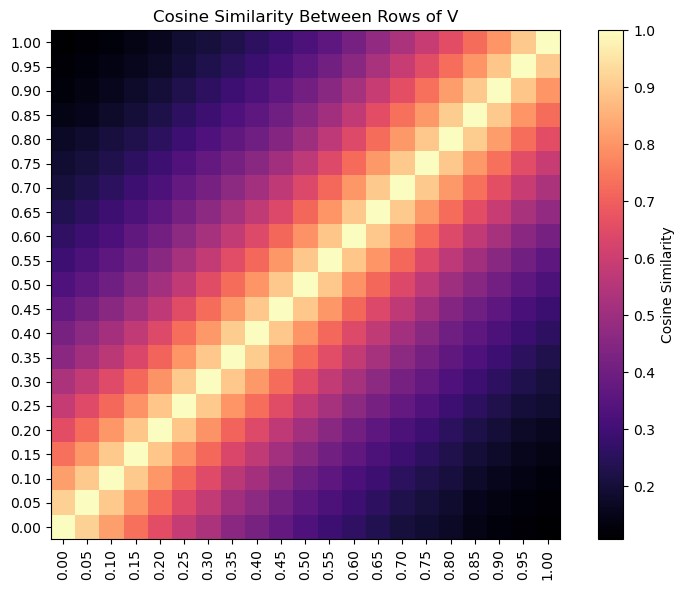

In [31]:
from sklearn.metrics.pairwise import cosine_similarity

# Calcular la matriz de similaridad coseno
cos_sim_matrix = cosine_similarity(reds_hdv)
cos_sim_matrix = cos_sim_matrix[::-1, :]

# Representar la matriz de similaridad como DataFrame para mejor visualización
df_cos_sim = pd.DataFrame(cos_sim_matrix,
                          index=[f"V{i}" for i in range(reds_hdv.shape[0])],
                          columns=[f"V{i}" for i in range(reds_hdv.shape[0])])

# Mostrar en formato tabla
display(df_cos_sim)

# Representar la matriz de similaridad coseno con un mapa de calor
plt.figure(figsize=(8, 6))
plt.imshow(cos_sim_matrix, cmap='magma', interpolation='nearest')
plt.colorbar(label='Cosine Similarity')
plt.title("Cosine Similarity Between Rows of V")
plt.xticks(ticks=np.arange(len(color_steps)),
           labels=[f"{val:.2f}" for val in color_steps], rotation=90)
plt.yticks(ticks=np.arange(len(color_steps)),
           labels=[f"{val:.2f}" for val in color_steps[::-1]])

plt.tight_layout()
plt.show()


In [32]:
greens_hdv = range_hdvs(color_steps)
blues_hdv = range_hdvs(color_steps)

In [33]:
def col_ind(component):
    return round(component * 20)

def encode_col(color):
    return bind(reds_hdv[col_ind(color[0])],
                greens_hdv[col_ind(color[1])],
                blues_hdv[col_ind(color[2])])

In [34]:
colhdv = encode_col(acolor)

In [35]:
ref_colors = [{'color':c, 'hdv':encode_col(c)} for c in [randcol() for _ in range(1000)]]

In [36]:
def decode_colors(v):
    best_match = max(ref_colors, key=lambda item: cosine_similarity(v, item["hdv"]))
    return best_match["color"]

In [37]:
decode_colors(colhdv)

ValueError: Expected 2D array, got 1D array instead:
array=[-1.  1.  1. ...  1. -1. -1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.